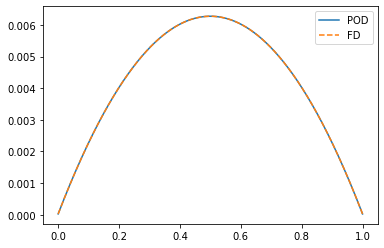

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from solvers import Solver
from methods.DataDrivenMethods import DDMethod

params_solver = {'equation': 'Poisson', 'domain': [0, 1], 'D': 0., 'nx': 1001}
Dmin, Dmax = 1, 10
D_list = D = np.linspace(Dmin, Dmax, 10)

U_sols = []
for d in D_list:
    params_solver['D'] = d
    solver = Solver(params=params_solver)
    U_sols.append(solver.solve())

params_method = params_solver
params_method['method'] = 'POD'
params_method['POD_params'] = {'n_components': 2}
params_method['U'] = U_sols

method = DDMethod(params=params_method)

new_D = 20
U_POD = method.apply_method(new_D)
solver = Solver(params=params_solver)
solver.change_D(D=new_D)
U_FD = solver.solve()
plt.plot(solver.x, U_POD, label='POD')
plt.plot(solver.x, U_FD, '--', label='FD')
plt.legend()
plt.show()